In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"C:\Users\ASUS\Downloads\crop_production.csv") #go to the csv file and then copy the path 

In [4]:
df.shape

(246091, 7)

In [5]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [6]:
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (246091, 7)
                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [7]:
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


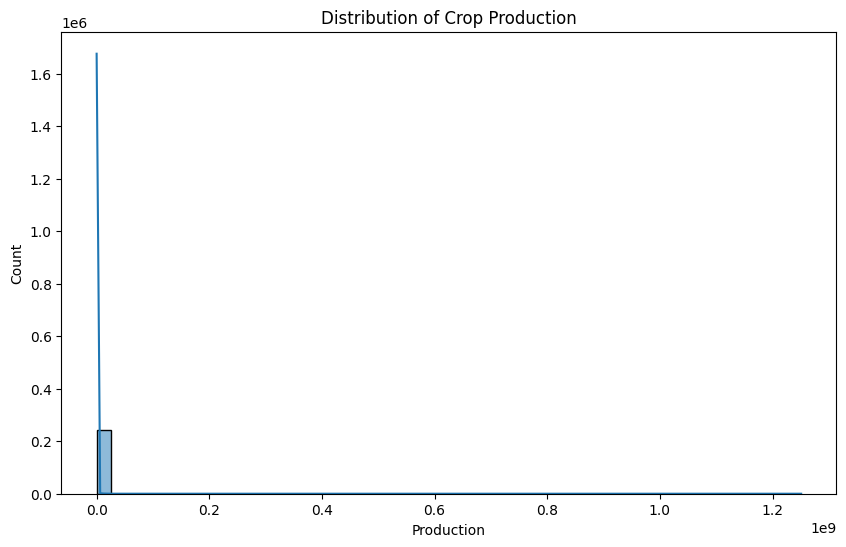

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(df['Production'], bins=50, kde=True)
plt.title("Distribution of Crop Production")
plt.show()

In [9]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

In [10]:
print("Columns in dataset:", df.columns)

Columns in dataset: Index(['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area',
       'production'],
      dtype='object')


In [11]:
df = df.dropna(subset=["crop_year", "crop", "area", "production"])
df = df[df["area"] > 0]              # remove invalid areas
df = df[df["production"] >= 0]       # remove negative production

In [12]:
df["yield_t_per_ha"] = df["production"] / df["area"]

In [13]:
print("Rows after cleaning:", df.shape[0])
print("Years range:", df["crop_year"].min(), "to", df["crop_year"].max())
print("Unique crops:", df["crop"].nunique())

Rows after cleaning: 242361
Years range: 1997 to 2015
Unique crops: 124


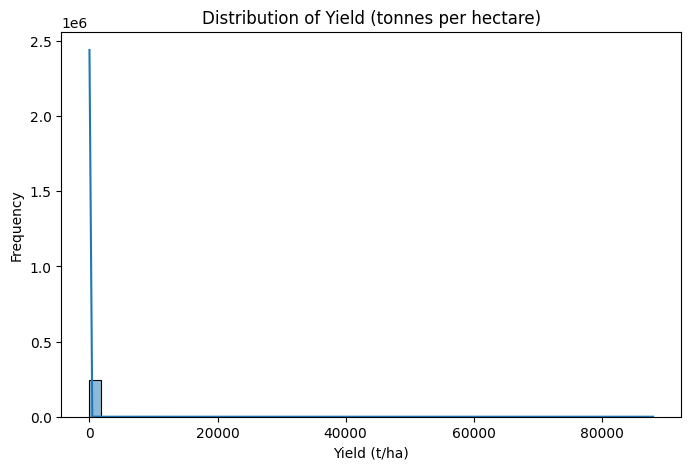

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["yield_t_per_ha"], bins=50, kde=True)
plt.title("Distribution of Yield (tonnes per hectare)")
plt.xlabel("Yield (t/ha)")
plt.ylabel("Frequency")
plt.show()

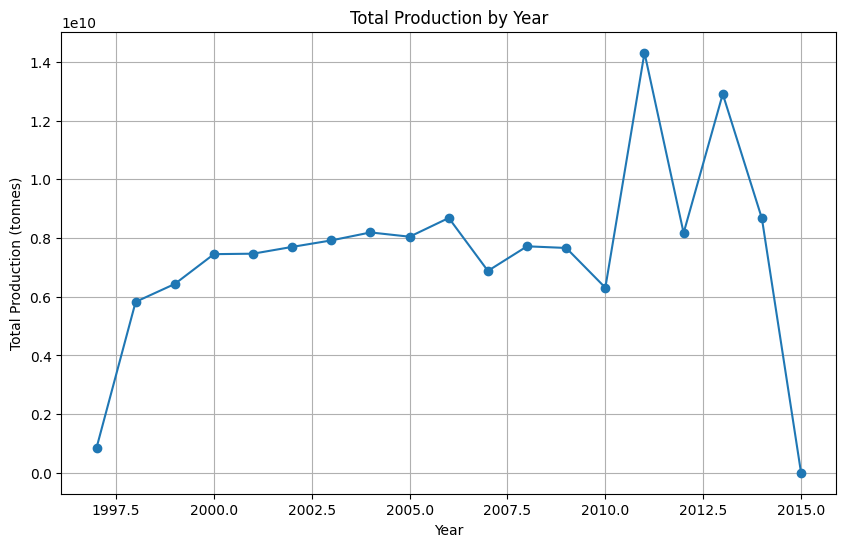

In [15]:
yearly_prod = df.groupby("crop_year")["production"].sum().sort_index()
plt.figure(figsize=(10,6))
yearly_prod.plot(kind="line", marker="o")
plt.title("Total Production by Year")
plt.ylabel("Total Production (tonnes)")
plt.xlabel("Year")
plt.grid(True)
plt.show()

In [16]:
df.to_csv("crop_yield_cleaned.csv", index=False)

print("✅ Cleaned dataset saved as crop_yield_cleaned.csv")

✅ Cleaned dataset saved as crop_yield_cleaned.csv


In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error


In [18]:
df = pd.read_csv(r"C:\Users\ASUS\Downloads\crop_yield_cleaned.xls")

print("Shape:", df.shape)
print(df.head())


Shape: (242361, 8)
                    state_name district_name  crop_year       season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  crop    area  production  yield_t_per_ha  
0             Arecanut  1254.0      2000.0        1.594896  
1  Other Kharif pulses     2.0         1.0        0.500000  
2                 Rice   102.0       321.0        3.147059  
3               Banana   176.0       641.0        3.642045  
4            Cashewnut   720.0       165.0        0.229167  


In [19]:
cat_cols = df.select_dtypes(include=["object"]).columns
print("Categorical columns:", list(cat_cols))

label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

df.head()


Categorical columns: ['state_name', 'district_name', 'season', 'crop']


,state_name,district_name,crop_year,season,crop,area,production,yield_t_per_ha
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167


In [20]:
X = df.drop(columns=["yield_t_per_ha"])
y = df["yield_t_per_ha"]

print("Feature columns:", list(X.columns))
print("Target:", "yield_t_per_ha")


Feature columns: ['state_name', 'district_name', 'crop_year', 'season', 'crop', 'area', 'production']
Target: yield_t_per_ha


In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (193888, 7) Test size: (48473, 7)


In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
lr = LinearRegression()
lr.fit(X_train, y_train)

# Prediction
y_pred_lr = lr.predict(X_test)
r2 = r2_score(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)

print("Linear Regression R²:", r2)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

Linear Regression R²: 0.16876102908415103
MAE: 74.34465822738497
MSE: 449680.48610804946
RMSE: 670.5821993671242


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Load cleaned dataset
df = pd.read_csv(r"C:\Users\ASUS\Downloads\crop_yield_cleaned.xls")

# Encode categorical features
cat_cols = ["state_name", "district_name", "season", "crop"]
encoders = {}
for col in cat_cols:
    encoders[col] = LabelEncoder()
    df[col] = encoders[col].fit_transform(df[col])

# Features and Target
X = df.drop(columns=["yield_t_per_ha"])
y = df["yield_t_per_ha"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
df

,state_name,district_name,crop_year,season,crop,area,production,yield_t_per_ha
0,0,427,2000,1,2,1254.0,2000.0,1.594896
1,0,427,2000,1,74,2.0,1.0,0.500000
2,0,427,2000,1,95,102.0,321.0,3.147059
3,0,427,2000,4,7,176.0,641.0,3.642045
4,0,427,2000,4,22,720.0,165.0,0.229167
...,...,...,...,...,...,...,...,...
242356,32,471,2014,3,95,306.0,801.0,2.617647
242357,32,471,2014,3,102,627.0,463.0,0.738437
242358,32,471,2014,4,106,324.0,16250.0,50.154321
242359,32,471,2014,5,95,279151.0,597899.0,2.141848


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pandas as pd

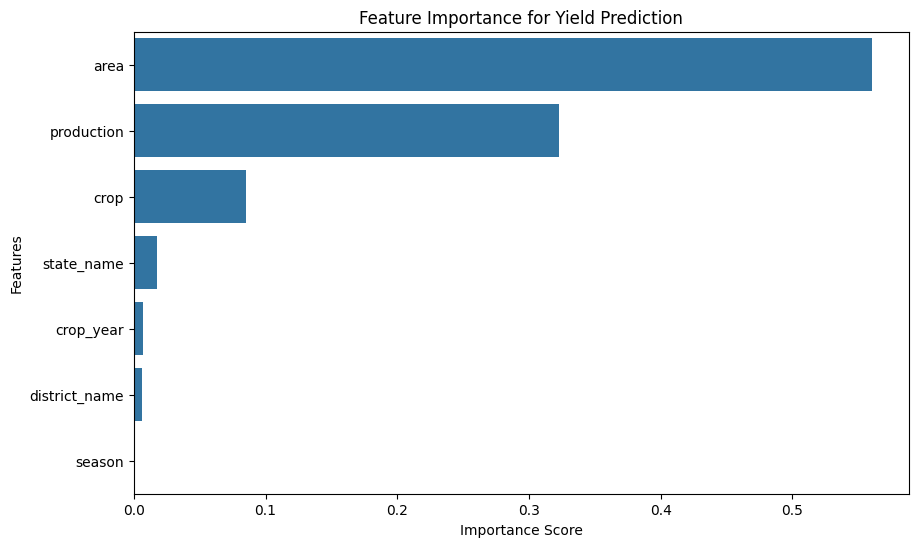

In [33]:
# Feature Importance
importances = rf_model.feature_importances_
features = X.columns

feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance for Yield Prediction")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


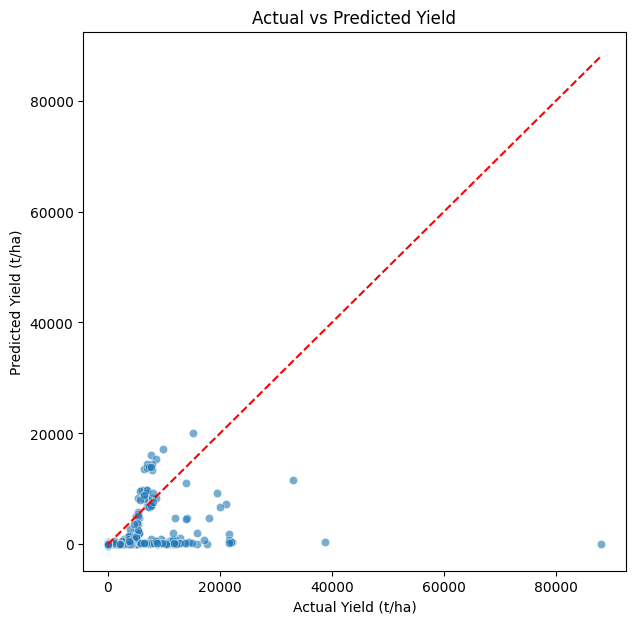

In [34]:
plt.figure(figsize=(7,7))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Actual vs Predicted Yield")
plt.xlabel("Actual Yield (t/ha)")
plt.ylabel("Predicted Yield (t/ha)")
plt.show()


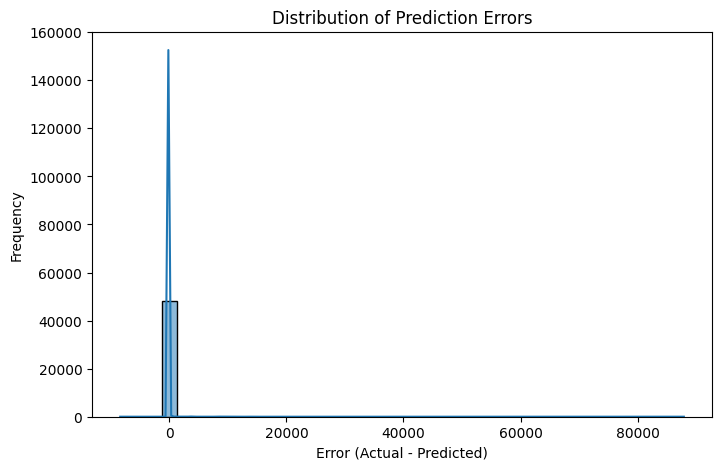

In [35]:
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, bins=40, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error (Actual - Predicted)")
plt.ylabel("Frequency")
plt.show()


In [36]:
import joblib

joblib.dump(rf_model, "crop_yield_model.pkl")
print("✅ Random Forest model saved as crop_yield_model.pkl")


✅ Random Forest model saved as crop_yield_model.pkl


In [37]:
pip install streamlit


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
import streamlit as st
import pandas as pd
import joblib

# Load trained model
model = joblib.load("crop_yield_model.pkl")

# Load cleaned dataset (to get columns for encoding)
sample_df = pd.read_csv(r"C:\Users\ASUS\Downloads\crop_yield_cleaned.xls")

# Page config
st.set_page_config(page_title="Crop Yield Prediction", layout="centered")

# Title
st.title("🌾 Crop Yield Prediction App")
st.markdown("Predict agricultural crop yield based on historical data using Machine Learning.")

# Sidebar inputs
st.sidebar.header("Enter Crop Details")
state = st.sidebar.text_input("State", "Odisha")
district = st.sidebar.text_input("District", "Khordha")
season = st.sidebar.selectbox("Season", ["Kharif", "Rabi", "Summer", "Whole Year", "Autumn", "Winter"])
crop = st.sidebar.text_input("Crop", "Rice")
year = st.sidebar.number_input("Crop Year", min_value=2000, max_value=2025, value=2014)
area = st.sidebar.number_input("Area of Cultivation (in hectares)", min_value=1.0, value=100.0)

# Create input dataframe
input_data = pd.DataFrame({
    'state_name': [state],
    'district_name': [district],
    'crop_year': [year],
    'season': [season],
    'crop': [crop],
    'area': [area]
})

# One-hot encode categorical variables using training columns
X_columns = sample_df.drop(columns=['production', 'yield_t_per_ha']).columns
input_encoded = pd.get_dummies(input_data).reindex(columns=X_columns, fill_value=0)

# Prediction
if st.sidebar.button("Predict Yield"):
    y_pred = model.predict(input_encoded)[0]
    st.success(f"🌱 Estimated Crop Yield: {y_pred:.2f} Quintals/ha")

2025-09-01 01:56:32.022 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.023 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-01 01:56:32.024 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar